<a href="https://colab.research.google.com/github/PhuongAnh2212/CS313DeepLearningforAI/blob/main/Plot_map_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Plot saved as /content/robot_path_plot.png


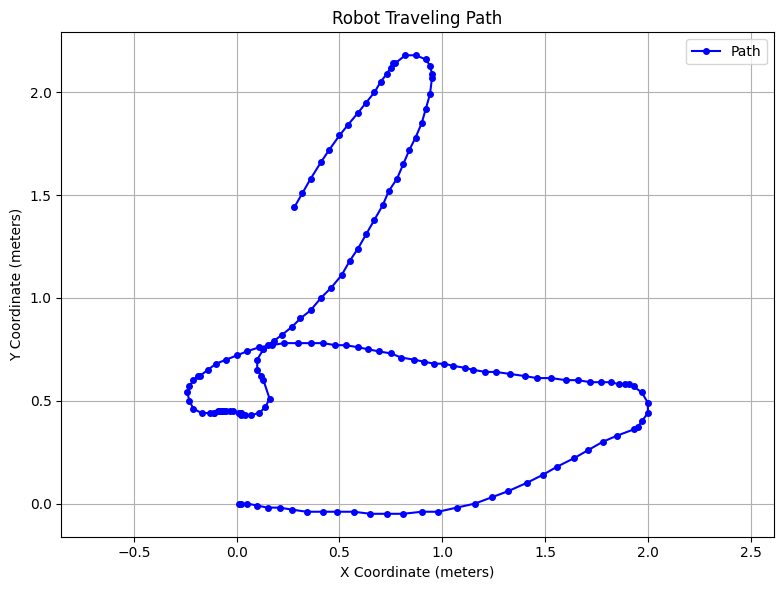

In [ ]:
# Plot data from CSV
def plot_data():
        # Load data from the CSV file
        df = pd.read_csv('SensorData.csv')
        x = df['x']
        y = df['y']

        # Create a plot
        plt.figure(figsize=(8, 6))

        # Add a line connecting the points
        plt.plot(x, y, marker='o', markersize=4, linestyle='-', color='blue', label="Path")

        # Customize the plot
        plt.xlabel('X Coordinate (meters)')
        plt.ylabel('Y Coordinate (meters)')
        plt.title('Robot Traveling Path')
        plt.legend()
        plt.grid(True)
        plt.axis('equal')
        plt.tight_layout()

        # Save the plot to the file
        plot_filename = os.path.join(os.getcwd(), "robot_path_plot.png")
        plt.savefig(plot_filename)
        print(f"Plot saved as {plot_filename}")

plot_data()

Plot saved as /content/robot_path_plot.png


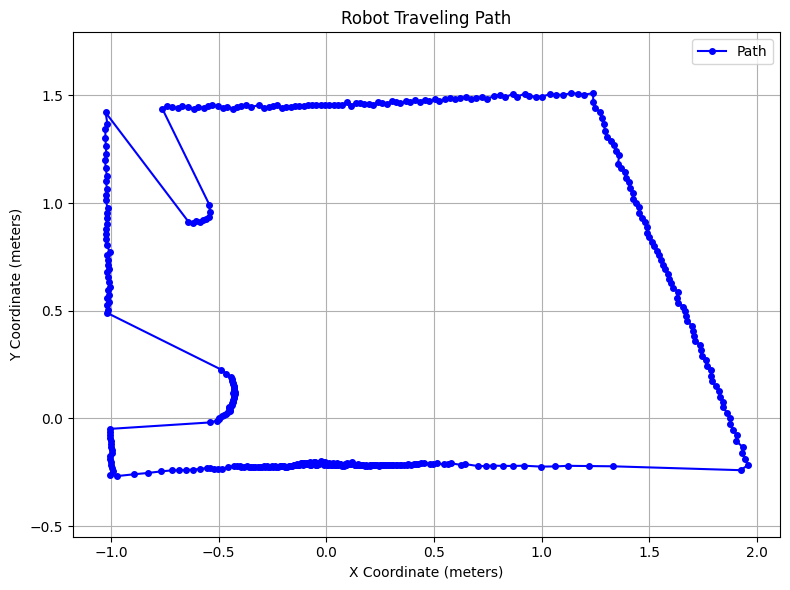

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated LiDAR data (polar coordinates: angle in radians, distance in meters)
angles = np.linspace(-np.pi, np.pi, 360)
distances = np.random.uniform(0.5, 5.0, size=360)  # Simulated distances (0.5m to 5m)

# Convert polar to Cartesian coordinates
x = distances * np.cos(angles)
y = distances * np.sin(angles)

# Robot position
robot_position = (0, 0)  # Assuming robot is at the origin

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=10, label="LiDAR Points")  # LiDAR scan points
plt.plot(robot_position[0], robot_position[1], 'ro', label="Robot Position")  # Robot position
plt.title("Robot Position and LiDAR Scan")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.axis("equal")  # Equal scaling for x and y axes
plt.legend()
plt.grid()
plt.show()

<ipython-input-6-4259f3d85e26>:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  robot_point.set_data(new_position[0], new_position[1])  # Update robot position


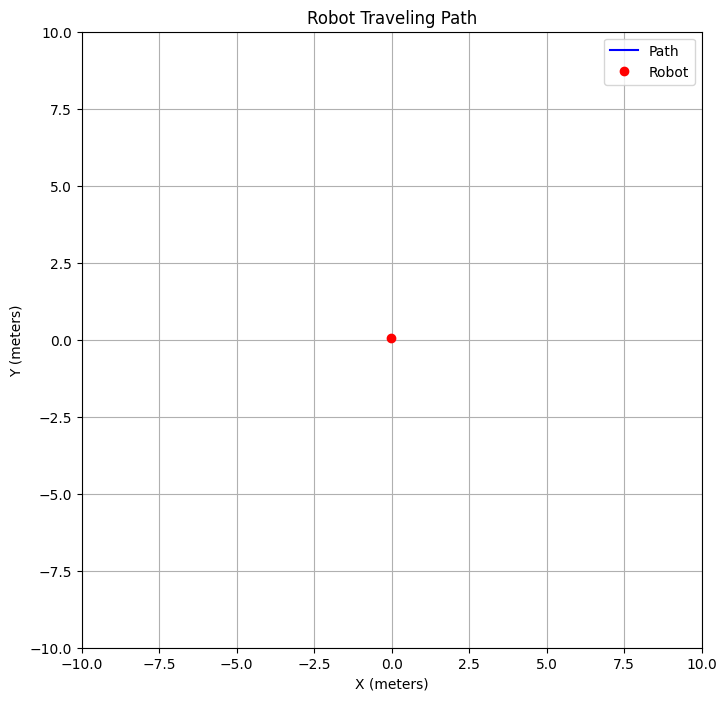

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Simulated robot positions (e.g., from odometry)
robot_positions = [(0, 0)]

# Function to simulate robot movement
def simulate_robot_movement():
    x, y = robot_positions[-1]  # Start from the last known position
    dx = np.random.uniform(-0.1, 0.1)  # Random x displacement
    dy = np.random.uniform(-0.1, 0.1)  # Random y displacement
    return x + dx, y + dy

# Plot setup
plt.ion()  # Interactive mode
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_title("Robot Traveling Path")
ax.set_xlabel("X (meters)")
ax.set_ylabel("Y (meters)")
path_line, = ax.plot([], [], 'b-', label="Path")  # Line for the path
robot_point, = ax.plot([], [], 'ro', label="Robot")  # Robot current position
plt.legend()
plt.grid()

# Update loop
for _ in range(100):  # Simulate 100 steps
    new_position = simulate_robot_movement()
    robot_positions.append(new_position)  # Append new position

    # Update the plot
    path_x, path_y = zip(*robot_positions)  # Unpack x, y positions
    path_line.set_data(path_x, path_y)  # Update path
    robot_point.set_data(new_position[0], new_position[1])  # Update robot position
    plt.pause(0.1)  # Pause for visualization

plt.ioff()  # Turn off interactive mode
plt.show()


Scatter plot saved as /content/robot_path_scatter_filtered.png


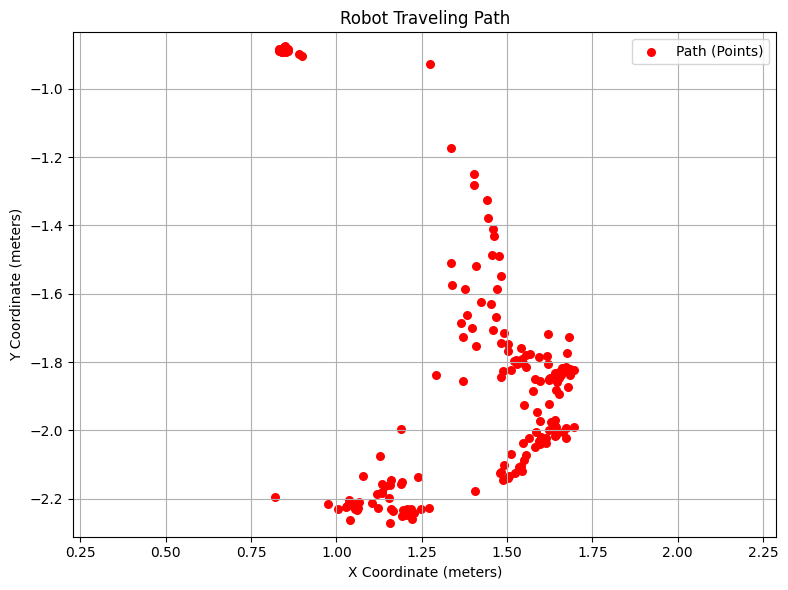

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_data():
    # Load data from the CSV file
    df = pd.read_csv('lidar.csv')

    # Filter out rows where X > 2
    df = df[df['X'] <= 2]

    x = df['X']
    y = df['Y']

    # Create a plot
    plt.figure(figsize=(8, 6))

    # Add a scatter plot
    plt.scatter(x, y, color='red', label="Path (Points)", s=30)

    # Customize the plot
    plt.xlabel('X Coordinate (meters)')
    plt.ylabel('Y Coordinate (meters)')
    plt.title('Robot Traveling Path')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()

    # Save the plot to the file
    plot_filename = os.path.join(os.getcwd(), "robot_path_scatter_filtered.png")
    plt.savefig(plot_filename)
    print(f"Scatter plot saved as {plot_filename}")

# Call the function to execute
plot_data()


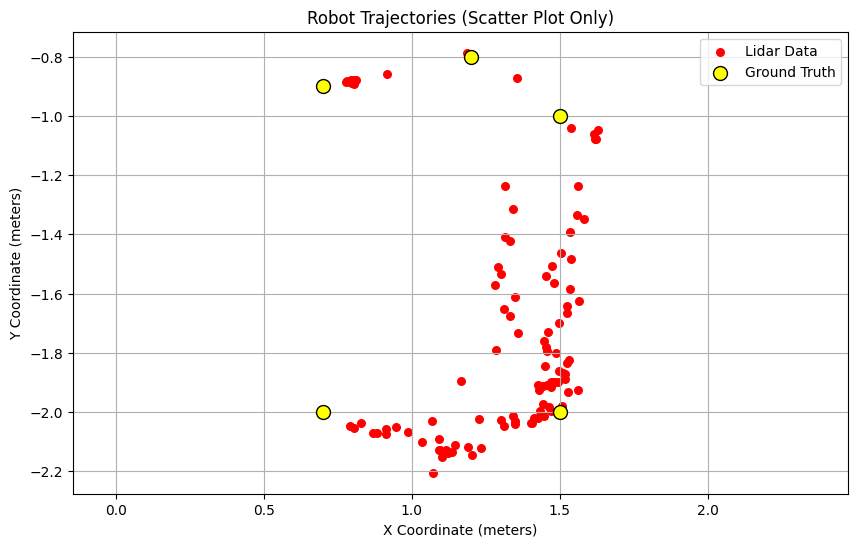

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Input points for ground truth trajectory (open path)
ground_truth_points = np.array([
    [7, -4],
    [7, -9],
    [3, -9],
    [3, -4],
    [5.5, -4]
])

# Generate additional points for smooth ground truth plotting
def interpolate_points(points, num=100):
    smooth_points = []
    for i in range(len(points) - 1):
        x = np.linspace(points[i, 0], points[i+1, 0], num)
        y = np.linspace(points[i, 1], points[i+1, 1], num)
        smooth_points.append(np.column_stack((x, y)))
    return np.vstack(smooth_points)

ground_truth_smooth = interpolate_points(ground_truth_points)

# Read data from CSV files
def read_csv(filepath):
    data = []
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        # Skip the header row
        next(reader)

        for row in reader:
            x = float(row[0])
            y = float(row[1])

            # Include only rows where X <= 2 and filter the noise (1.0 < x < 1.5, -1.2 < y < -2)
            if x <= 2 and not (1.0 < x < 1.5 and -1.2 < y < -2):
                data.append([x, y])
    return np.array(data)

# Replace these with the actual file paths
landmark_file = "lidar_po.csv"
landmark_data = read_csv(landmark_file)

# Define the additional points to be marked
yellow_points = np.array([
    [0.7, -2],
    [1.5, -2],
    [1.5, -1],
    [1.2, -0.8],
    [0.7, -0.9]
])

# Plot all data
plt.figure(figsize=(10, 6))

# Scatter plot for the landmark-based method
plt.scatter(landmark_data[:, 0], landmark_data[:, 1], label='Lidar Data', color='red', s=30)

# Mark the additional points in yellow
plt.scatter(yellow_points[:, 0], yellow_points[:, 1], color='yellow', label='Ground Truth', edgecolors='black', s=100, zorder=5)

# Graph formatting
plt.xlabel("X Coordinate (meters)")
plt.ylabel("Y Coordinate (meters)")
plt.title("Robot Trajectories (Scatter Plot Only)")
plt.legend(loc="best")
plt.grid(True)
plt.axis("equal")
plt.show()
